In [ ]:
import torch

In [1]:
!nvidia-smi # changing to default T4 GPU provided by colab

Thu Jun 12 06:25:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

# Explore

In [5]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 88.3MB/s]


In [6]:
results = model("https://ultralytics.com/images/bus.jpg")  # Inference


100%|██████████| 134k/134k [00:00<00:00, 8.66MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 40.3ms
Speed: 52.7ms preprocess, 40.3ms inference, 311.0ms postprocess per image at shape (1, 3, 640, 480)


In [7]:
type(results)


list

In [8]:
results # like expected, its trained on coco dataset with 80 classes

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [10]:
results[0].boxes  # Bounding box coordinates, confidence, and class

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 5.,  0.,  0.,  0.,  0., 11.], device='cuda:0')
conf: tensor([0.8734, 0.8657, 0.8528, 0.8252, 0.2611, 0.2551], device='cuda:0')
data: tensor([[2.2871e+01, 2.3128e+02, 8.0500e+02, 7.5684e+02, 8.7345e-01, 5.0000e+00],
        [4.8550e+01, 3.9855e+02, 2.4535e+02, 9.0270e+02, 8.6569e-01, 0.0000e+00],
        [6.6947e+02, 3.9219e+02, 8.0972e+02, 8.7704e+02, 8.5284e-01, 0.0000e+00],
        [2.2152e+02, 4.0580e+02, 3.4497e+02, 8.5754e+02, 8.2522e-01, 0.0000e+00],
        [0.0000e+00, 5.5053e+02, 6.3007e+01, 8.7344e+02, 2.6111e-01, 0.0000e+00],
        [5.8171e-02, 2.5446e+02, 3.2557e+01, 3.2487e+02, 2.5507e-01, 1.1000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([6, 6])
xywh: tensor([[413.9369, 494.0588, 782.1313, 525.5631],
        [146.9480, 650.6274, 196.7951, 504.1505],
        [739.5966, 634.6108, 140.2473, 484.8494],
        [283.2440, 631.6676, 123.4533, 451.7380],
    

In [11]:
results[0].plot()  # Returns annotated image (np array)
# results[0].save()  # Saves it to disk

array([[[119, 146, 172],
        [121, 148, 174],
        [122, 152, 177],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       [[120, 147, 173],
        [122, 149, 175],
        [123, 153, 178],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       [[123, 150, 176],
        [124, 151, 177],
        [125, 155, 180],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       ...,

       [[183, 182, 186],
        [179, 178, 182],
        [180, 179, 183],
        ...,
        [121, 111, 117],
        [113, 103, 109],
        [115, 105, 111]],

       [[165, 164, 168],
        [173, 172, 176],
        [187, 186, 190],
        ...,
        [102,  92,  98],
        [101,  91,  97],
        [103,  93,  99]],

       [[123, 122, 126],
        [145, 144, 148],
        [176, 175, 179],
        ...,
        [ 95,  85,  91],
        [ 96,  86,  92],
        [ 98,  88,  94]]

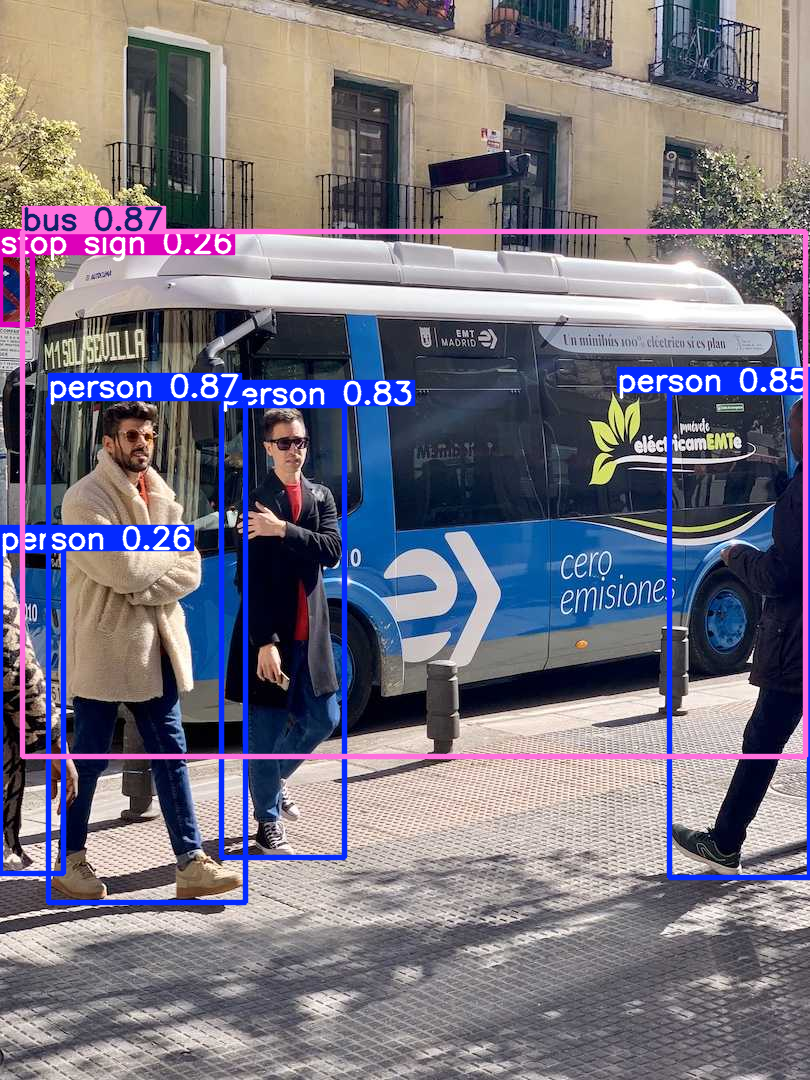

In [12]:
results[0].show()  # Displays image inline (with boxes)


In [13]:
model.info()


YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


(72, 3151904, 0, 8.746444799999999)

In [14]:
model.names


{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [15]:
def format_yolo_results(results):
    """
    Formats the YOLOv8 output nicely from Ultralytics.
    Args:
        results: output from `model(image)`
    Returns:
        Formatted pandas DataFrame with bounding box, class name, and confidence.
    """
    import pandas as pd

    boxes = results[0].boxes  # only first image
    if boxes is None:
        return pd.DataFrame({"Message": ["No objects detected."]})

    # Extract box data
    df = pd.DataFrame(boxes.xyxy.cpu().numpy(), columns=["x1", "y1", "x2", "y2"])
    df["width"] = df["x2"] - df["x1"]
    df["height"] = df["y2"] - df["y1"]
    df["confidence"] = boxes.conf.cpu().numpy()
    df["class_id"] = boxes.cls.cpu().numpy().astype(int)
    df["label"] = [results[0].names[int(c)] for c in boxes.cls]

    # Clean formatting
    df = df[["label", "confidence", "x1", "y1", "x2", "y2", "width", "height"]]
    df["confidence"] = df["confidence"].apply(lambda x: round(float(x), 4))
    df[["x1", "y1", "x2", "y2", "width", "height"]] = df[["x1", "y1", "x2", "y2", "width", "height"]].round().astype(int)

    return df.sort_values(by="confidence", ascending=False).reset_index(drop=True)


In [16]:
format_yolo_results(results)

label  confidence   x1   y1   x2   y2  width  height
0        bus      0.8734   23  231  805  757    782     526
1     person      0.8657   49  399  245  903    197     504
2     person      0.8528  669  392  810  877    140     485
3     person      0.8252  222  406  345  858    123     452
4     person      0.2611    0  551   63  873     63     323
5  stop sign      0.2551    0  254   33  325     32      70

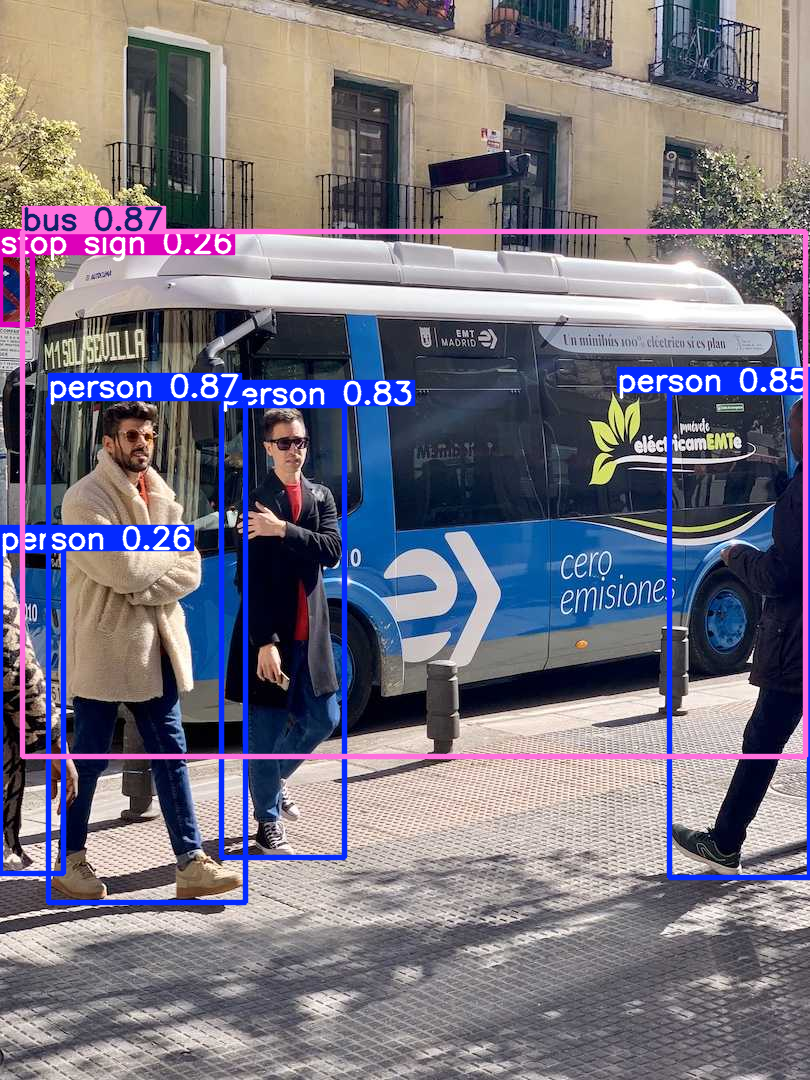

In [17]:
results[0].show()

In [19]:
from google.colab import files
uploaded = files.upload()


Saving myimage1.jpeg to myimage1.jpeg


In [20]:
results2 = model("myimage1.jpeg")


image 1/1 /content/myimage1.jpeg: 480x640 1 bottle, 1 laptop, 39.5ms
Speed: 3.6ms preprocess, 39.5ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


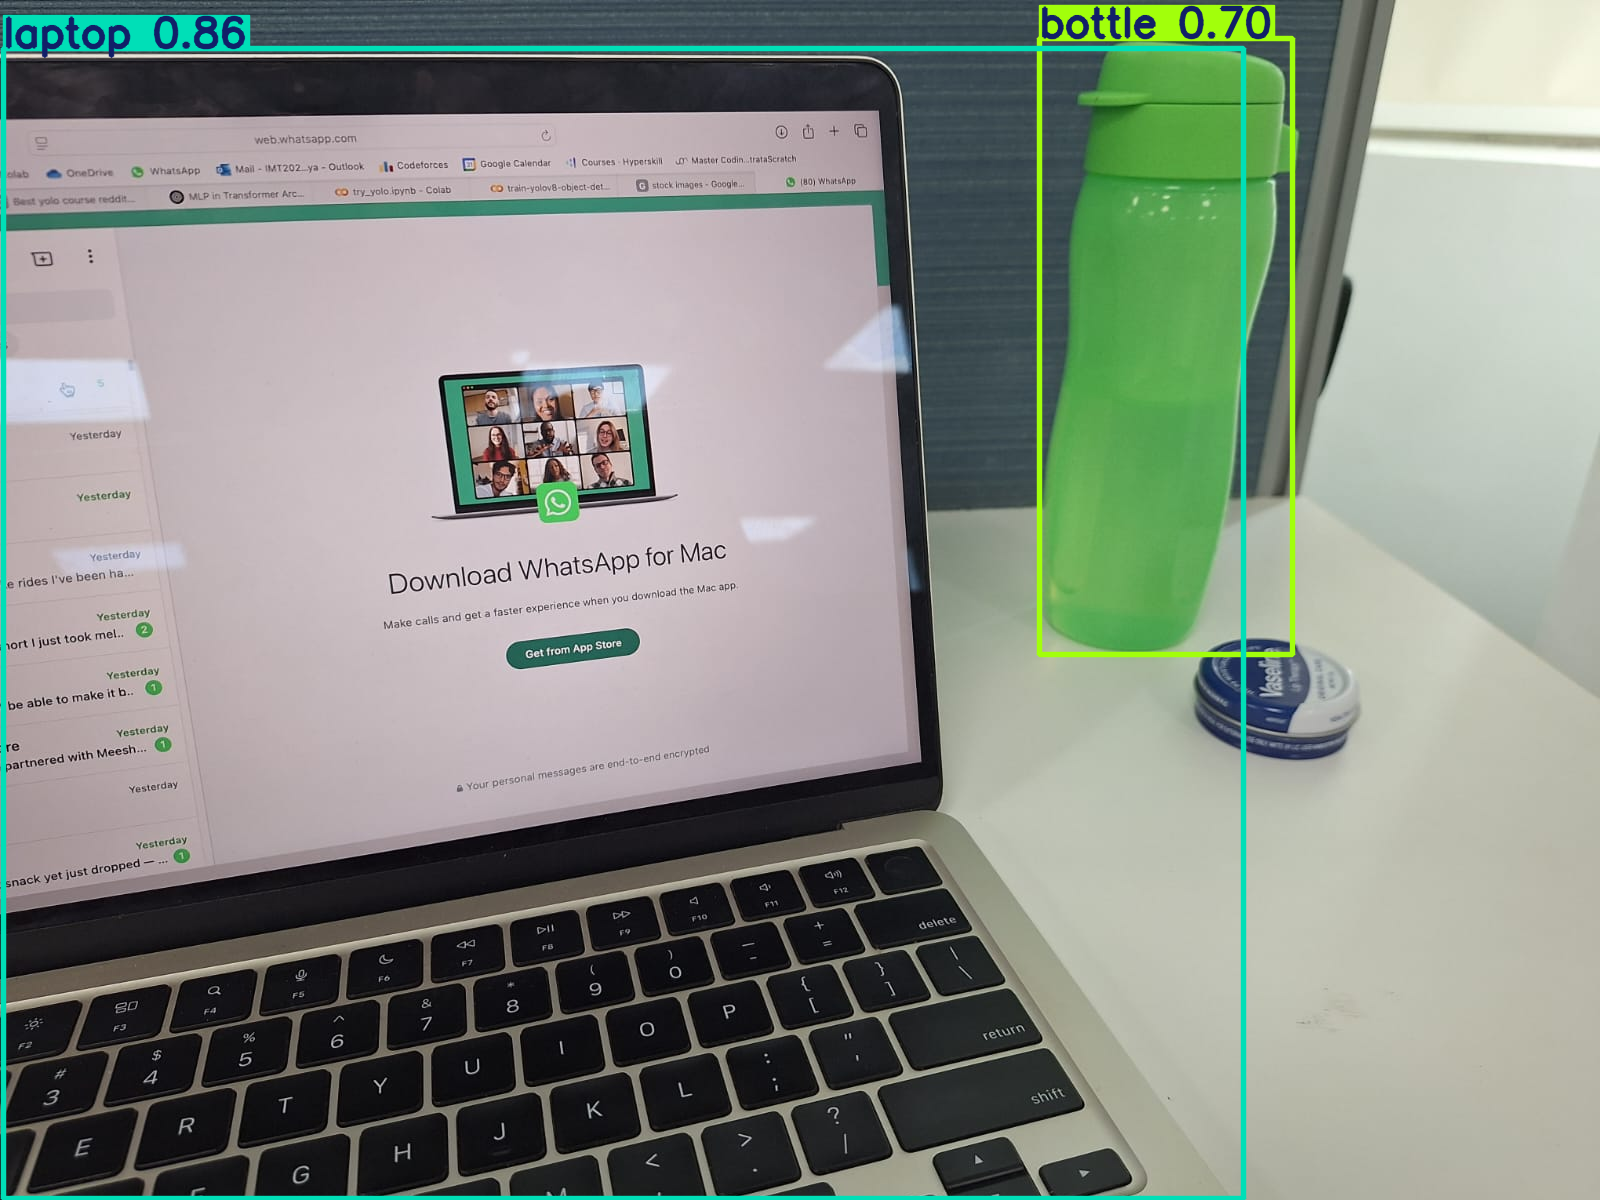

In [22]:
results2[0].show()

In [23]:
ls

bus.jpg  myimage1.jpeg  results_bus.jpg  yolov8n.pt


In [34]:
results3 = model("bus.jpg", conf = 0.8) # confidence is a hyperparameter you can tune, here it doesn't detect the fourth person and the stop sign


image 1/1 /content/bus.jpg: 640x480 3 persons, 1 bus, 7.0ms
Speed: 2.6ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


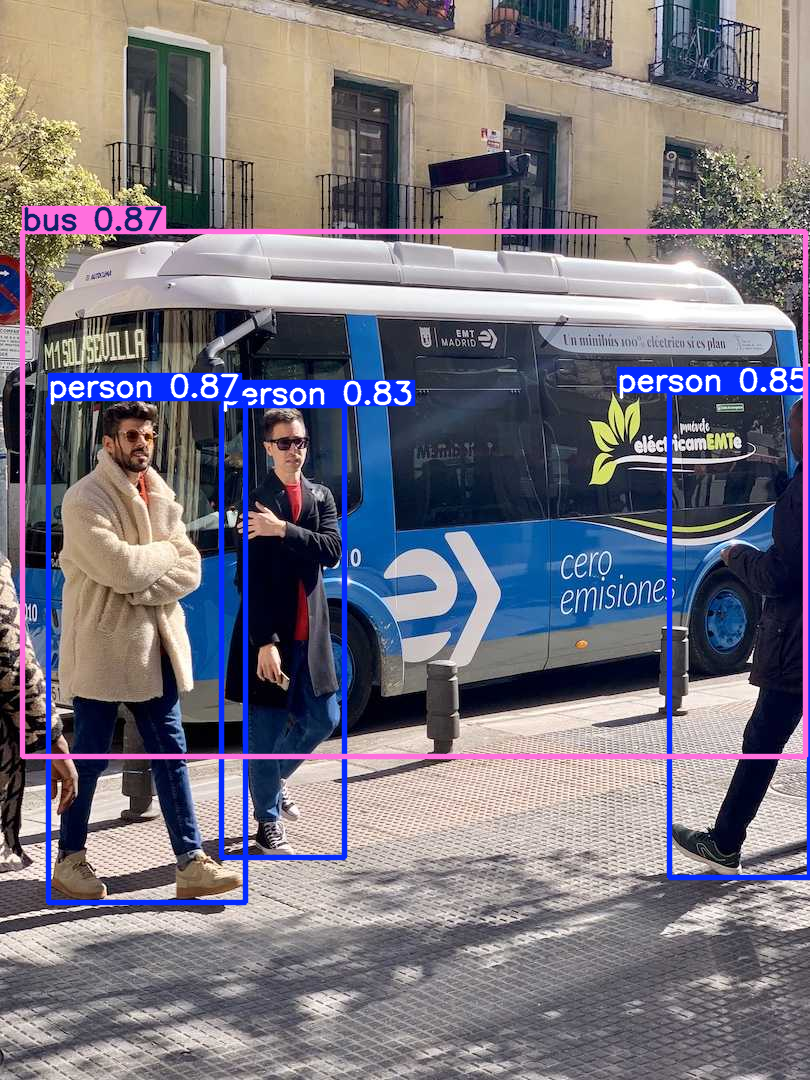

In [35]:
results3[0].show()

In [36]:
import torch
weights = torch.load("yolov8n.pt")
print(weights.keys())  # Will show model or state_dict


dict_keys(['date', 'version', 'license', 'docs', 'epoch', 'best_fitness', 'model', 'ema', 'updates', 'optimizer', 'train_args'])


In [44]:
weights.values()

dict_values(['2022-12-30T00:12:08.084698', '8.0.0.dev0', 'AGPL-3.0 License (https://ultralytics.com/license)', 'https://docs.ultralytics.com', -1, None, DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), 